#Nama : Agung Al Hafizin
#NIM    : 09011281823040
#Kelas: SK5B   

In [ ]:
import os
os.getcwd()   

'/content'

In [ ]:
os.chdir("/content/drive/My Drive/Colab Notebooks/")
os.getcwd()          

'/content/drive/My Drive/Colab Notebooks'

In [ ]:
import requests
import numpy as np
from bs4 import BeautifulSoup as bs
import urllib.request
import os

Fruits = ["banana fruit","orange  fruit"]

for fruit in Fruits:
    os.chdir("/content/drive/My Drive/Colab Notebooks/IMG/"+fruit)

In [21]:
from skimage.transform import resize
from skimage.io import imread

target = []
images = []
flat_data = []

Datadir = "/content/drive/My Drive/Colab Notebooks/IMG/"

for fruit in Fruits:
    class_num = Fruits.index(fruit)
    
    path = os.path.join(Datadir,fruit)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized = resize(img_array,(100,100,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)
        print(img+" done")
    print(fruit+" done")
        
target = np.array(target)
images = np.array(images)
flat_data = np.array(flat_data)

9.jpg done
5.jpg done
2.jpg done
3.jpg done
6.jpg done
4.jpg done
8.jpg done
7.jpg done
10.jpg done
1.jpg done
banana fruit done
4.jpg done
1.jpg done
7.jpg done
6.jpg done
9.jpg done
2.jpg done
5.jpg done
8.jpg done
10.jpg done
3.jpg done
orange  fruit done


In [23]:
import pandas as pd
df = pd.DataFrame(flat_data)
#Adding output to dataframe
df['Fruit type'] = target

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,29961,29962,29963,29964,29965,29966,29967,29968,29969,29970,29971,29972,29973,29974,29975,29976,29977,29978,29979,29980,29981,29982,29983,29984,29985,29986,29987,29988,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999,Fruit type
0,0.000000,0.364706,0.352941,0.000000,0.372549,0.360784,0.000000,0.380392,0.368627,0.000000,0.392157,0.376529,0.000000,0.407843,0.392157,0.000000,0.419608,0.403922,0.000000,0.427451,0.415686,0.000000,0.439216,0.423529,0.000000,0.450980,0.435294,0.000000,0.459843,0.447059,0.000000,0.470588,0.454902,0.000000,0.478431,0.466667,0.000000,0.490196,0.474510,0.000000,...,0.003922,0.454902,0.443137,0.003922,0.454902,0.443137,0.003922,0.450980,0.439216,0.003922,0.450980,0.438196,0.003922,0.450980,0.439216,0.003922,0.450980,0.435294,0.003922,0.447059,0.431373,0.003922,0.443137,0.431373,0.003922,0.447059,0.428471,0.003922,0.443137,0.427451,0.003922,0.443137,0.423529,0.003922,0.443137,0.423529,0.003922,0.443137,0.423529,0
1,0.019608,0.015686,0.007843,0.019608,0.015686,0.007843,0.019608,0.015686,0.007843,0.019608,0.015686,0.007843,0.019608,0.015686,0.007843,0.019608,0.015686,0.007843,0.019608,0.015686,0.007843,0.019608,0.015686,0.007843,0.019608,0.015686,0.007843,0.019608,0.015686,0.007843,0.019608,0.015686,0.007843,0.019608,0.015686,0.007843,0.019608,0.015686,0.007843,0.019608,...,0.043137,0.023529,0.015686,0.043137,0.023529,0.011765,0.047059,0.027451,0.015686,0.047059,0.027451,0.015686,0.043137,0.023529,0.011765,0.043137,0.023529,0.011765,0.043137,0.023529,0.011765,0.047059,0.027451,0.013785,0.047059,0.027451,0.015686,0.047059,0.027451,0.015686,0.047059,0.027451,0.015686,0.047059,0.027451,0.015686,0.050980,0.029146,0.015686,0
2,0.788235,0.603922,0.388235,0.792157,0.607843,0.396078,0.792157,0.607843,0.396078,0.792157,0.607843,0.396078,0.788725,0.607843,0.392157,0.792157,0.607843,0.396078,0.792157,0.608333,0.396078,0.792157,0.607843,0.396078,0.792157,0.607843,0.392157,0.792157,0.611765,0.396078,0.792157,0.611765,0.400000,0.792157,0.615686,0.403922,0.796078,0.615686,0.403922,0.796078,...,0.835294,0.666667,0.486275,0.835294,0.666667,0.486275,0.835294,0.665123,0.478431,0.831373,0.662745,0.474510,0.831373,0.662745,0.474510,0.831373,0.658824,0.474510,0.831373,0.658824,0.470588,0.827451,0.654902,0.470588,0.827451,0.654902,0.466667,0.823529,0.651397,0.462745,0.823529,0.650980,0.458824,0.819608,0.647059,0.454902,0.819608,0.647059,0.450980,0
3,0.235294,0.227451,0.239216,0.239216,0.235294,0.243137,0.247059,0.239216,0.247059,0.250980,0.243137,0.250980,0.254902,0.247059,0.258824,0.258824,0.254902,0.262745,0.262745,0.258824,0.266667,0.270588,0.262745,0.270588,0.274510,0.266667,0.278431,0.278431,0.274510,0.282353,0.282353,0.278431,0.286275,0.282353,0.278431,0.290196,0.282353,0.282353,0.290196,0.286275,...,0.925255,0.713725,0.376471,0.905882,0.688781,0.349020,0.870588,0.631457,0.299602,0.878431,0.639216,0.294118,0.835294,0.572549,0.231373,0.803922,0.533333,0.184314,0.803922,0.549020,0.188235,0.784314,0.524605,0.163765,0.746720,0.487896,0.137255,0.557804,0.376941,0.133333,0.160000,0.124706,0.094118,0.109804,0.094118,0.090196,0.105882,0.090196,0.086275,0
4,0.901961,0.909804,0.913725,0.901961,0.909804,0.913725,0.901961,0.905882,0.913725,0.901961,0.905882,0.913725,0.901961,0.905882,0.913725,0.898039,0.901961,0.909804,0.898039,0.901961,0.909804,0.898039,0.901961,0.909804,0.901961,0.905882,0.913725,0.901961,0.905882,0.913725,0.901961,0.905882,0.913725,0.905882,0.909804,0.917647,0.905882,0.909804,0.917647,0.905882,...,0.894118,0.898039,0.905882,0.894118,0.898039,0.905882,0.894118,0.901961,0.905882,0.894118,0.898039,0.905882,0.894118,0.898039,0.905882,0.890196,0.897890,0.901961,0.890196,0.894118,0.901961,0.890196,0.894118,0.901961,0.890196,0.894118,0.901961,0.890196,0.894118,0.901961,0.890196,0.894118,0.901961,0.890196,0.894118,0.901961,0.890196,0.894118,0.901961,0
5,0.901961,0.690196,0.070588,0.901961,0.69803

In [24]:
#Input
x = df.iloc[:,0:-1].values
#Output
y = df.iloc[:,-1].values

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
print(x_train.shape)
print(x_test.shape)

(15, 30000)
(5, 30000)


In [26]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([8, 7]))

In [27]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([2, 3]))

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid =[
                {'C':[1,10,100,1000],'kernel': ['linear']},
                {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel': ['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid, verbose=1, n_jobs=-1)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [29]:
y_test

array([1, 0, 1, 0, 1])

In [30]:
new_pred = clf.predict(x_test)
new_pred

array([0, 1, 1, 1, 0])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(new_pred,y_test)

0.2

In [37]:
from matplotlib import pyplot as plt
def Test():
    flat_new_img = []
    img_url = input("Enter the image URL")
    img = imread(img_url)
    img_resized = resize(img,(100,100,3))
    flat_new_img.append(img_resized.flatten())
    flat_new_img = np.array(flat_new_img)
    print(img.shape)
    plt.imshow(img_resized)
    Predicted = clf.predict(flat_new_img)
    y_out = clf.predict(flat_new_img)
    y_out = Fruits[y_out[0]]
    print("Predicted Output: "+y_out)

Enter the image URLhttps://cdn2.tstatic.net/style/foto/bank/images/buah-pisang_20170504_095822.jpg
(393, 700, 3)
Predicted Output: banana fruit


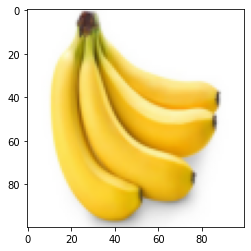

In [39]:
Test()

Enter the image URLhttps://www.sobatcantik.com/wp-content/uploads/2013/12/jeruk.jpg
(600, 600, 3)
Predicted Output: orange  fruit


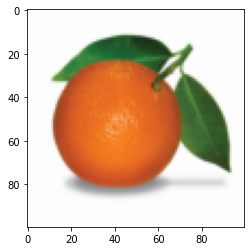

In [40]:
Test()